## [pneumonia](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)

In [1]:
import os
import random
import numpy as np
import torch
import torchvision

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [3]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100%|█████████████████████████████████████▉| 2.29G/2.29G [01:15<00:00, 33.5MB/s]
100%|██████████████████████████████████████| 2.29G/2.29G [01:15<00:00, 32.4MB/s]


In [4]:
!unzip chest-xray-pneumonia.zip

Archive:  chest-xray-pneumonia.zip
  inflating: chest_xray/__MACOSX/._chest_xray  
  inflating: chest_xray/__MACOSX/chest_xray/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/._test  
  inflating: chest_xray/__MACOSX/chest_xray/._train  
  inflating: chest_xray/__MACOSX/chest_xray/test/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/test/._NORMAL  
  inflating: chest_xray/__MACOSX/chest_xray/test/._PNEUMONIA  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0003-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0005-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0006-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0007-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0009-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0010-0001.jpeg  
  inflating: chest_x

In [5]:
base_dir = '.'

In [6]:
data_dir = base_dir + '/chest_xray/chest_xray'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train', '.DS_Store', 'val']
['PNEUMONIA', 'NORMAL', '.DS_Store']


## [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder)

In [7]:
dataset = torchvision.datasets.ImageFolder(data_dir+'/train')

In [8]:
print(type(dataset))

# tuple: (image, target)

<class 'torchvision.datasets.folder.ImageFolder'>


In [9]:
print(len(dataset))

5216


In [10]:
n = 200
data, target = dataset[n]

In [11]:
print(type(data))

<class 'PIL.Image.Image'>


In [12]:
print(data.mode, data.width, data.height)

RGB 1666 1333


In [13]:
print(type(target))

<class 'int'>


In [14]:
print(set(dataset.targets))

{0, 1}


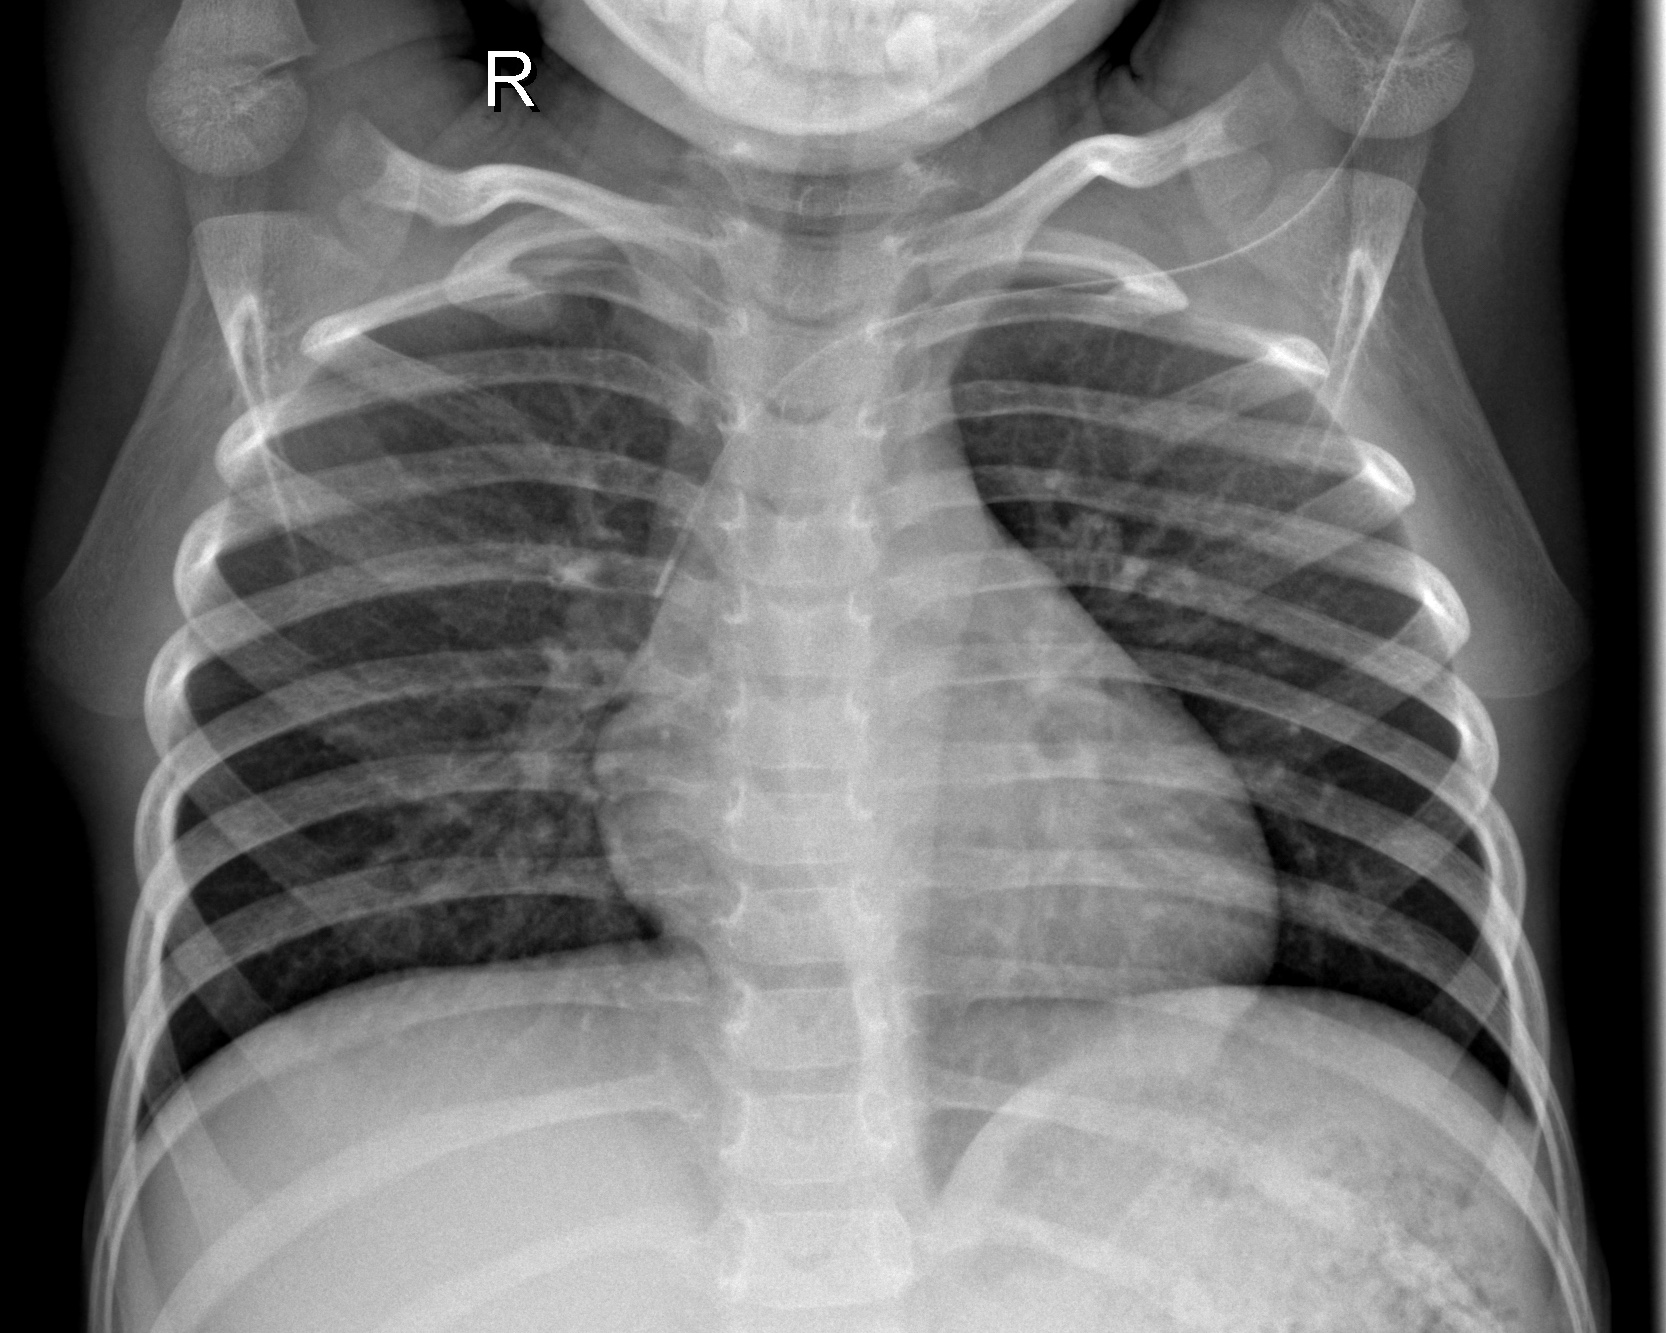

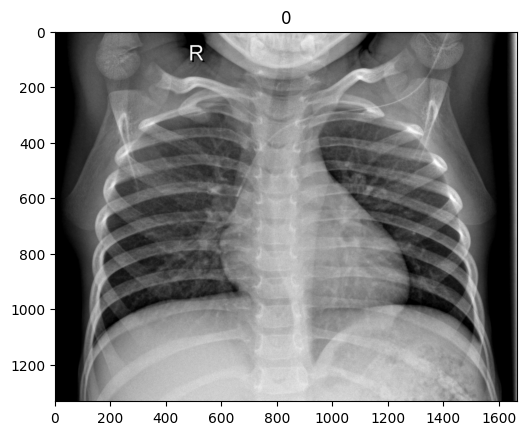

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data)
data.show()

In [16]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
compose = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
dataset = torchvision.datasets.ImageFolder(data_dir+'/train', transform=compose)

In [17]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 3, 224, 224])
torch.Size([3, 224, 224])


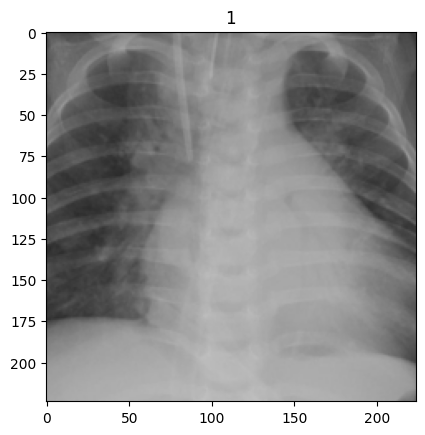

In [18]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic)
    plt.show()
    break

In [19]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

torch.Size([10, 3, 224, 224])
torch.Size([3, 224, 224])


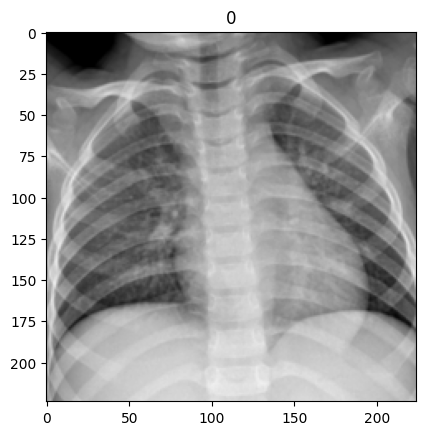

In [20]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(pic)
    plt.show()
    break

In [21]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [22]:
import torchvision.transforms as transforms
compose_train = transforms.Compose([
                      transforms.Resize(255),
                      transforms.CenterCrop(224),
                      transforms.RandomHorizontalFlip(),
                      transforms.RandomRotation(10),
                      transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                      transforms.ToTensor(),
                      transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                      ])
compose_test = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

train_data = torchvision.datasets.ImageFolder(data_dir+'/train', transform=compose_train)
test_data = torchvision.datasets.ImageFolder(data_dir+'/test', transform=compose_train)

In [23]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 5216
test sets: 624


In [24]:
BATCH_SIZE = 10

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [25]:
import torchvision.models as models

model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

model.l1 = nn.Linear(512, 256)
model.l2 = nn.Linear(256, 128)
model.l3 = nn.Linear(128, 2)

nn.init.kaiming_normal_(model.l1.weight)
nn.init.kaiming_normal_(model.l2.weight)
nn.init.kaiming_normal_(model.l3.weight)

model.fc = nn.Sequential(nn.BatchNorm1d(512),
                         nn.Dropout(0.5),
                         model.l1,
                         nn.BatchNorm1d(256),
                         nn.Dropout(0.5),
                         model.l2,
                         nn.BatchNorm1d(128),
                         nn.Dropout(0.5),
                         model.l3,
                         nn.BatchNorm1d(2),
                         nn.Dropout(0.5)
                      )
model = model.to(device)

/home/ubuntu/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [26]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y = model(data)
    print(y)
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([10, 3, 224, 224])
tensor([[ 0.0000,  0.0000],
        [-0.0000, -2.7358],
        [-2.3600,  0.0000],
        [ 1.0253,  3.0703],
        [-0.1554,  0.0000],
        [-0.2049, -2.4214],
        [-1.7437,  0.0000],
        [ 0.0000, -0.9408],
        [-2.1794,  0.0000],
        [ 0.0000, -0.0000]], device='cuda:0')
tensor([0, 0, 1, 1, 1, 0, 1, 0, 1, 0]) tensor([0, 1, 1, 1, 1, 1, 1, 0, 0, 1])


In [27]:
BATCH_SIZE = 200

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [28]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 7 # 7회 학습

list_training_loss = []
list_test_loss = []
batch_length = int(len(train_data) / BATCH_SIZE)

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y = model(train_data)
        del train_data
        loss = criterion(y, train_target).sum()
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1
        del train_target
        if( n_train % 5 == 0 ):
          print('epoch {}th: {}/{} loss - {}'.format(epoch, n_train, batch_length, loss.data.cpu().numpy().sum()))


    model.eval()
    n_test = 0
    test_loss = 0
    correct = 0
    total = 0
    for test_data, test_target in test_loader:
        test_data = test_data.to(device)
        test_target = test_target.to(device)
        y_pred = model(test_data)
        idx_pred = torch.max(y_pred, 1)[1]
        del test_data
        loss = criterion(y_pred, test_target).sum()
        test_loss += loss.data.cpu().numpy()
        n_test += 1
        total += len(test_target)
        correct += (idx_pred == test_target).sum()

    accuracy = correct * 100 / total
    print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
            epoch + 1, train_loss / n_train, test_loss / n_test,
            accuracy
        ))
    list_training_loss.append(train_loss / n_train)
    list_test_loss.append(test_loss / n_test)

epoch 0th: 5/26 loss - 0.7525302171707153
epoch 0th: 10/26 loss - 0.6515325903892517
epoch 0th: 15/26 loss - 0.6018445491790771
epoch 0th: 20/26 loss - 0.5587051510810852
epoch 0th: 25/26 loss - 0.5586187839508057
epoch 1th training loss: 0.6972981779663651 test loss: 0.5251837521791458, accuracy: 72.43589782714844
epoch 1th: 5/26 loss - 0.5001180768013
epoch 1th: 10/26 loss - 0.5386518239974976
epoch 1th: 15/26 loss - 0.5042551159858704
epoch 1th: 20/26 loss - 0.5623941421508789
epoch 1th: 25/26 loss - 0.5859161615371704
epoch 2th training loss: 0.5422987695093509 test loss: 0.44508539140224457, accuracy: 76.6025619506836
epoch 2th: 5/26 loss - 0.48929327726364136
epoch 2th: 10/26 loss - 0.5272715091705322
epoch 2th: 15/26 loss - 0.5042265057563782
epoch 2th: 20/26 loss - 0.4849544167518616
epoch 2th: 25/26 loss - 0.5385082364082336
epoch 3th training loss: 0.5037293886696851 test loss: 0.3762237951159477, accuracy: 82.53205108642578
epoch 3th: 5/26 loss - 0.5722084641456604
epoch 3th

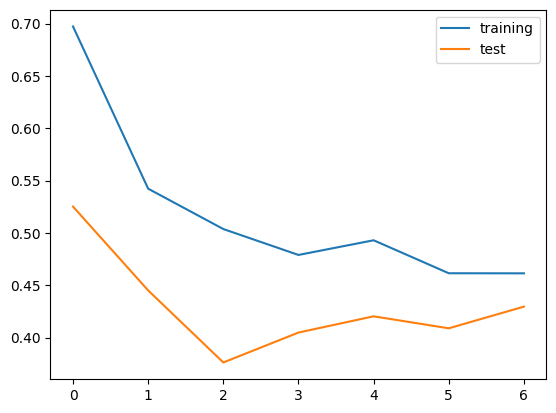

In [29]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()